In [ ]:
import pandas as pd
path = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_IoT_dataset/IoT_Modbus.csv"
weatherData = pd.read_csv(path)
print(weatherData.shape)
weatherData.head()

(287194, 8)


,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal


In [ ]:
mBusData.drop('type', axis = 1, inplace=True)
mBusData.drop(mBusData.iloc[:, 0:2], axis = 1, inplace=True)
mBusData.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label
0,53287,1463,33518,23014,0
1,41029,55891,26004,50645,0
2,41029,55891,26004,50645,0
3,64661,40232,33460,44046,0
4,64661,40232,33460,44046,0


col:  FC1_Read_Input_Register


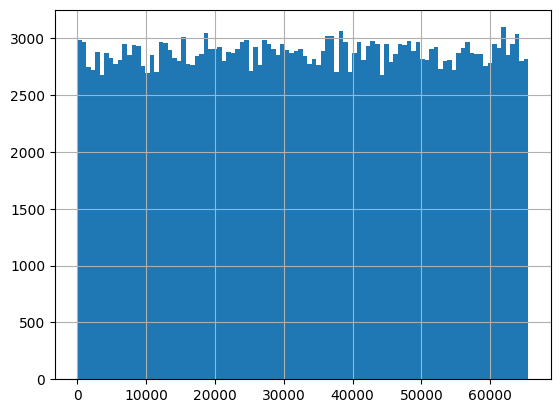

col:  FC2_Read_Discrete_Value


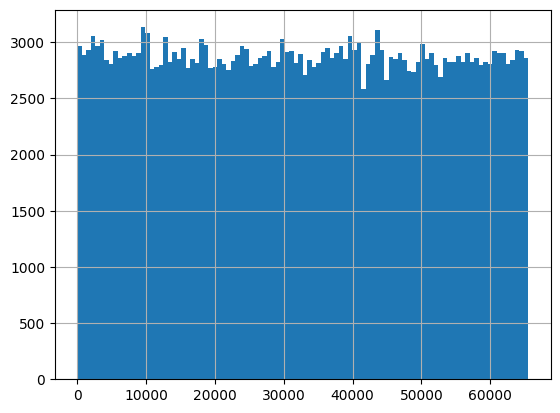

col:  FC3_Read_Holding_Register


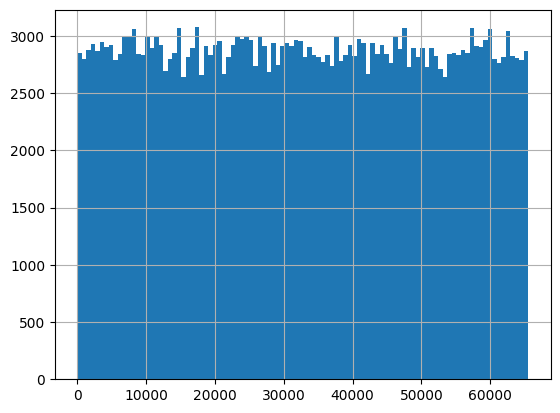

col:  FC4_Read_Coil


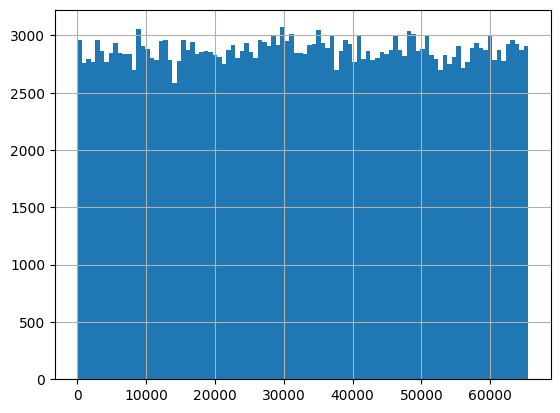

col:  label


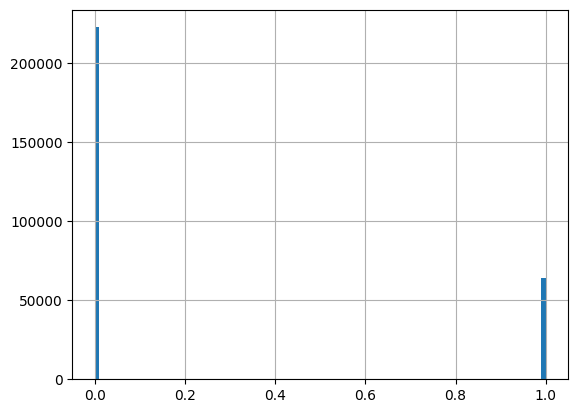

In [ ]:
import matplotlib.pyplot as plt
columns = mBusData.columns
for col in columns:
    print("col: ", col)
    mBusData[col].hist(bins = 100)
    plt.show()

In [ ]:
x = mBusData.drop('label', axis = 1)
y = mBusData['label']
print(y.value_counts())

0    222855
1     64339
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.9581537222077942
F1 Score: 0.9074554367213656


# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 194999, 1: 56296}
After oversampling {0: 194999, 1: 194999}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.9284304012021811
F1 Score: 0.9274368971126474


# ^Much better overall score when oversampled compared to undersampled and no sampling

# Result when we use undersampling on the data

In [ ]:
# saving the name of the target variable
target = 'label'

In [ ]:
import numpy as np
minority_class_len = len(mBusData[mBusData[target] == 1])
majority_class_indices = mBusData[mBusData[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)


In [ ]:
minority_class_indices = mBusData[mBusData[target] == 1].index

In [ ]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [ ]:
under_sample = mBusData.loc[under_sample_indices]

<AxesSubplot: xlabel='label', ylabel='count'>

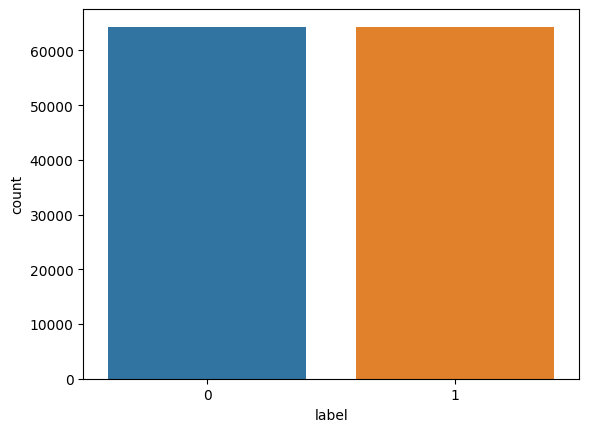

In [ ]:
import seaborn as sns
sns.countplot(x = target, data = under_sample)

In [ ]:
und_x = under_sample.loc[:, mBusData.columns !=target]
und_y = under_sample.loc[:, mBusData.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

Accuracy Score: 0.8644912043601988
F1 Score: 0.8729660350831069


# ^Lower Score on both metrics, so undersampling harms the quality